#### Imports

In [1]:
# Visualization
import matplotlib.pyplot as plt

# Builtin
from pathlib import Path
import sys
import subprocess
import os
import pdb


# Add repo path to system path for additional imports. 
# Note the relative depth from this notebook to system repo
# in case you want to move this file

nb_path = str(Path(os.path.abspath("")).parent.parent)
sys.path.insert(0, nb_path)
print(f"Added {nb_path} to system path")

# This computer git repos
from project.project_manager_module import ProjectManager
import cxsystem2.neurodynlib as nd
from brian2.units import *

Added C:\Users\Simo\Laskenta\Git_Repos\SystemTools to system path


#### Build paths
<font color=red>**Set the root_path to your SystemTools/scripts**</font>

In [2]:
#root_path = r"/opt2/Git_Repos/SystemTools/scripts/"
root_path = r"C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts/"

In [3]:
project = "FCN22"  
experiment = "Figure1CDE"  
experiment_path = Path.joinpath(Path(root_path), Path(project), experiment)

#### Call project manager
Code complexity is hidden behind the ProjectManager

In [4]:
PM = ProjectManager(
    path=experiment_path,
    input_folder="../in",
    output_folder="Comrad_noise",
    matlab_workspace_file="matlab_workspace_SingleSpike.mat",
    conn_skeleton_file_in="",
    conn_file_out="",
    input_filename="noise_210406_SingleSpike.mat",
    NG_name="NG3_L4_SS_L4",
    t_idx_start=2000,
    t_idx_end=-2000,
    project=project,
    experiment=experiment,
    startpoint_csv_folder="startpoint_csvs/LIF",
)

#### Copy Anat and Phys csv files from start point folder to path and update paths into the csv:s

In [5]:
anat_file_fullpath_out , phys_file_fullpath_out = PM.prepare_csvs_for_simulation(anat_name="Anat_Comrad_221122_monitorVm.csv")

#### Create necessary current injection files

In [6]:
PM.ct.create_current_injection(randomize=False)

#### Run CxSystem2 for single file

In [7]:
# Run CxSystem2 for single file. Remove the stdout=subprocess.DEVNULL to see simulation output
command_and_args = ["cxsystem2", "-a", str(anat_file_fullpath_out), "-p", str(phys_file_fullpath_out)]
subprocess.run(command_and_args, text=True, encoding="utf-8", stdout=subprocess.DEVNULL)

CompletedProcess(args=['cxsystem2', '-a', 'C:\\Users\\Simo\\Laskenta\\Git_Repos\\SystemTools\\scripts\\FCN22\\Figure1CDE\\Anat_Comrad_221122_noise.csv', '-p', 'C:\\Users\\Simo\\Laskenta\\Git_Repos\\SystemTools\\scripts\\FCN22\\Figure1CDE\\Phys_Comrad_221122_noise.csv'], returncode=0)

### Analyze and visualize the results for single files

#### Show input and data. 
If  file_to_display = None, the function selects the most recent data file in output_folder.


In [8]:
# file_to_display = r"[your/full/path/to/datafile].gz"  
file_to_display = None # Most recent

### Figure 1 C left

(0.2, 0.6)

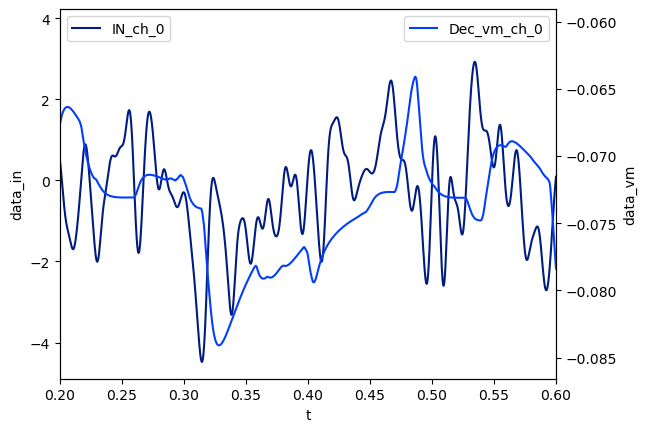

In [9]:
PM.viz.show_readout_on_input(
    results_filename=file_to_display, 
    normalize=False, 
    unit_idx_list=[0], 
    savefigname="" # Give a name, if you want to save the file, e.g. "Fig1C.eps"
)
plt.xlim((0.2, 0.6))

### Figure 1 C middle

(0.2, 0.6)

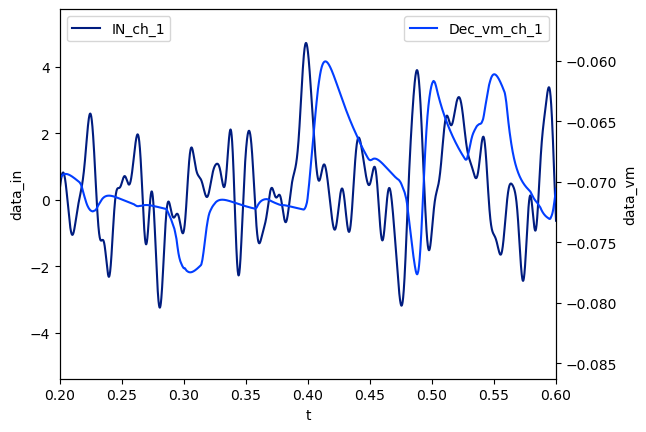

In [10]:
PM.viz.show_readout_on_input(
    results_filename=file_to_display, 
    normalize=False, 
    unit_idx_list=[1], 
    savefigname="" # Give a name, if you want to save the file, e.g. "Fig1C.eps"
)
plt.xlim((0.2, 0.6))

### Figure 1 C right

(0.2, 0.6)

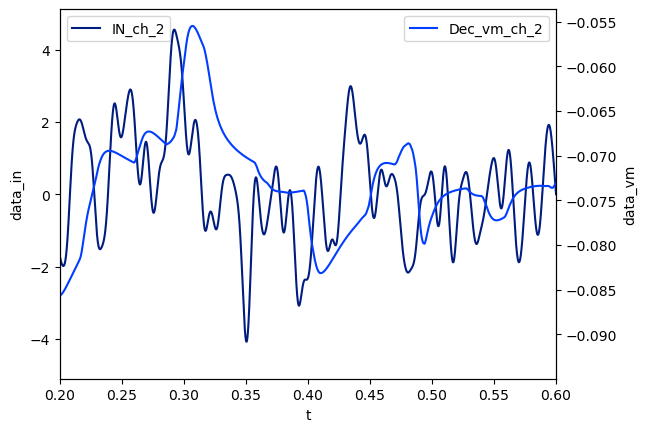

In [11]:
PM.viz.show_readout_on_input(
    results_filename=file_to_display, 
    normalize=False, 
    unit_idx_list=[2], 
    savefigname="" # Give a name, if you want to save the file, e.g. "Fig1C.eps"
)
plt.xlim((0.2, 0.6))

### Figure 1 D

['NG0_relay_vpm', 'NG1_L4_CI_SS_L4', 'NG2_L4_CI_BC_L4', 'NG3_L4_SS_L4']


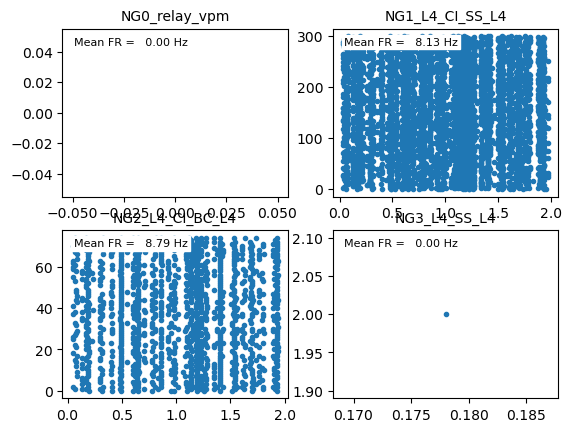

In [12]:
PM.viz.show_spikes(results_filename=file_to_display, savefigname="") # Give a name, if you want to save the file, e.g. "Fig1C.eps"

### Figure 1 E

In [13]:
data = PM.data_io.get_data(filename=None, data_type="results")
params = data["Neuron_Groups_Parameters"]["NG1_L4_CI_SS_L4"]["namespace"]
lif_neuron = nd.LifNeuron() # Get generic LIF neuron

lif_neuron.set_neuron_parameters(
    EL= params["EL"], 
    V_res= params["V_res"], 
    VT= params["VT"], 
    gL= params["gL"], 
    C= params["C"], 
    refractory_period= params["refractory_period"]
)
lif_neuron.get_neuron_parameters()

{'EL': -73. * mvolt,
 'V_res': -73. * mvolt,
 'VT': -55. * mvolt,
 'gL': 4. * nsiemens,
 'C': 125. * pfarad,
 'refractory_period': 3. * msecond}

N_steps = 101


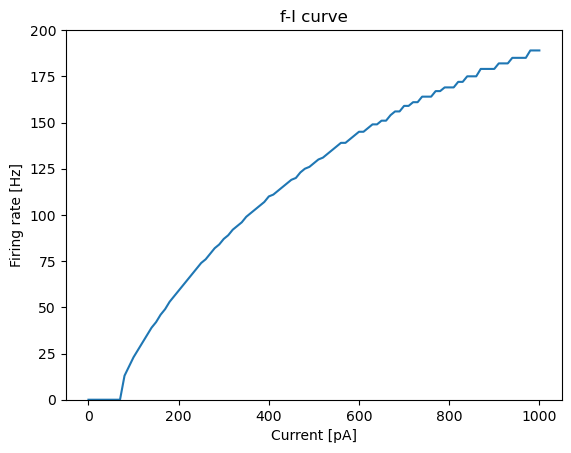

In [14]:
max_rate = 200
lif_neuron.plot_fi_curve(max_rate=max_rate, save_name=f"") # Give a name, if you want to save the file, e.g. "Fig1C.eps"

['NG1_L4_CI_SS_L4']


(0.0, 1000.0)

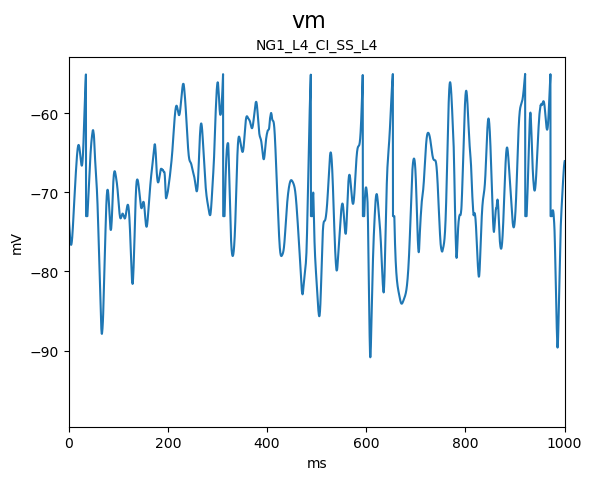

In [15]:
neuron_index = {"NG1_L4_CI_SS_L4": [1]} # Only three neurons are monitored
PM.viz.show_analog_results(
    results_filename=None,
    savefigname="", # Give a name, if you want to save the file, e.g. "Fig1C.eps"
    param_name="vm",
    startswith="NG1",
    neuron_index=neuron_index,
)
plt.xlim((0, 1000))

['NG2_L4_CI_BC_L4']


(0.0, 1000.0)

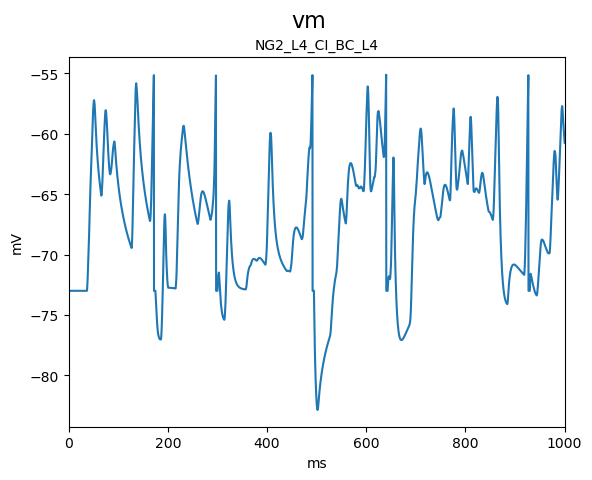

In [16]:
neuron_index = {"NG2_L4_CI_BC_L4": [1]} # Only three neurons are monitored
PM.viz.show_analog_results(
    results_filename=None,
    savefigname="", # Give a name, if you want to save the file, e.g. "Fig1C.eps"
    param_name="vm",
    startswith="NG2",
    neuron_index=neuron_index,
)
plt.xlim((0, 1000))